### Random Imputation  
- A method to handle **missing values** by replacing them with **randomly selected observed values** from the same variable.  
- Helps preserve the **original variable distribution**.  
- Works best when data is **Missing Completely at Random (MCAR)**.  
- **Advantage:** 
    - Maintains variance and avoids underestimation of standard errors.
    - Well suited for linear models as it does not distort the distribution, regardless of the % of NA
- **Disadvantage:** 
   - Can add extra randomness and reduce reproducibility; not reliable when missingness depends on other variables.  
   - Memory heavy for deployment, as we need to store the original training set to extract values from and reduce the NA in coming observations

In [20]:
import pandas as pd
import numpy as np

import sklearn
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns


In [21]:
df = pd.read_csv('train.csv', usecols=['Age','Fare','Survived'])

In [22]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [23]:
df.isnull().mean()*100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [24]:
x = df.drop('Survived', axis=1)
y = df['Survived']

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=2)


In [26]:
x_train['Age_imputed']= x_train['Age']
x_test['Age_imputed']= x_test['Age']

In [27]:
x_train['Age_imputed'][x_train['Age_imputed'].isnull()] = x_train["Age"].dropna().sample(x_train['Age'].isnull().sum()).values
x_test['Age_imputed'][x_test['Age_imputed'].isnull()] = x_test["Age"].dropna().sample(x_test['Age'].isnull().sum()).values

C:\Users\Pc\AppData\Local\Temp\ipykernel_10940\461545331.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  x_train['Age_imputed'][x_train['Age_imputed'].isnull()] = x_train["Age"].dropna().sample(x_train['Age'].isnull().sum()).values
C:\Us

In [28]:
x_train

,Age,Fare,Age_imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0
...,...,...,...
534,30.0,8.6625,30.0
584,NaN,8.7125,44.0
493,71.0,49.5042,71.0
527,NaN,221.7792,70.5


C:\Users\Pc\AppData\Local\Temp\ipykernel_10940\3472417001.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Age'], kde=True, label='Original Age', hist=False)
C:\Users\Pc\AppData\Local\Temp\ipykernel_10940\3472417001.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplo

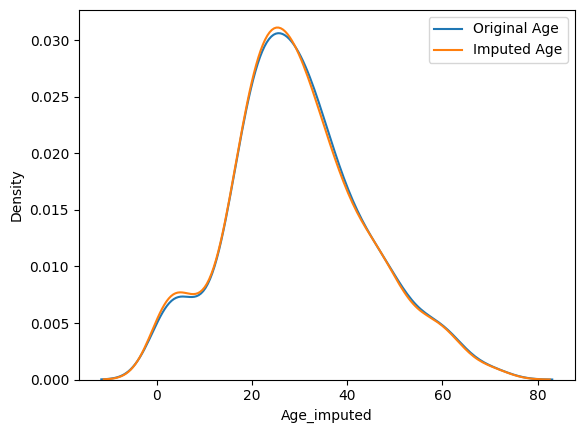

In [29]:
sns.distplot(x_train['Age'], kde=True, label='Original Age', hist=False)
sns.distplot(x_train['Age_imputed'], kde=True, label='Imputed Age', hist=False)

plt.legend()
plt.show()

In [30]:
print('Original variable variance',x_train['Age'].var())
print('Imputed variable variance',x_train['Age_imputed'].var())

Original variable variance 204.34951339046142
Imputed variable variance 205.6879531817427


In [31]:
x_train[['Fare', 'Age', 'Age_imputed']].cov()  

,Fare,Age,Age_imputed
Fare,2368.246832,71.512440,68.178806
Age,71.512440,204.349513,204.349513
Age_imputed,68.178806,204.349513,205.687953


<Axes: >

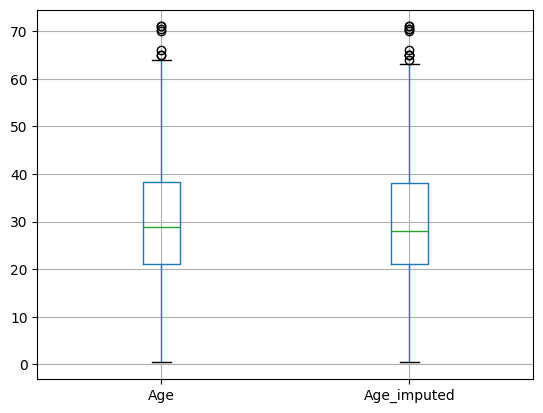

In [32]:
x_train[['Age','Age_imputed']].boxplot()

#### IT gives different prdicTion for same input because data is selected at random , So  we should generate same random value for same input

In [ ]:
sampled_value = x_train["Age"].dropna().sample(1,random_state= int(observation['Fare']))

In [34]:
data = pd.read_csv('house-train.csv', usecols=['GarageQual', 'FireplaceQu', 'SalePrice'])

In [35]:
data.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [36]:
data.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [37]:
x = data
y= data['SalePrice']

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [39]:
x_train["GarageQual_imputed"] = x_train['GarageQual']
x_test["GarageQual_imputed"] = x_test['GarageQual'] 

x_train['FireplaceQu_imputed'] = x_train['FireplaceQu']
x_test['FireplaceQu_imputed'] = x_test['FireplaceQu']

In [41]:
x_train.sample(5)

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
1302,TA,TA,290000,TA,TA
949,TA,TA,197500,TA,TA
93,Gd,TA,133900,TA,Gd
206,TA,TA,143900,TA,TA
82,Gd,TA,245000,TA,Gd


In [43]:
temp = pd.concat([
    x_train['GarageQual'].value_counts()/len(x_train['GarageQual'].dropna()),
    x_train['GarageQual_imputed'].value_counts()/len(x_train)
], axis=1)

temp.columns = ['Original', 'Imputed']

In [44]:
temp

,Original,Imputed
TA,0.949189,0.897751
Fa,0.034595,0.032720
Gd,0.011892,0.011247
Ex,0.003243,0.003067
Po,0.001081,0.001022


In [46]:
temp = pd.concat([
    x_train['FireplaceQu'].value_counts()/len(x_train['FireplaceQu'].dropna()),
    x_train['FireplaceQu_imputed'].value_counts()/len(x_train)
], axis=1)

temp.columns = ['Original', 'Imputed']
temp

,Original,Imputed
Gd,0.485323,0.253579
TA,0.410959,0.214724
Fa,0.043053,0.022495
Ex,0.033268,0.017382
Po,0.027397,0.014315


C:\Users\Pc\AppData\Local\Temp\ipykernel_10940\524508952.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[x_train['FireplaceQu']==category]['SalePrice'], hist=False, label=category)
C:\Users\Pc\AppData\Local\Temp\ipykernel_10940\524508952.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750

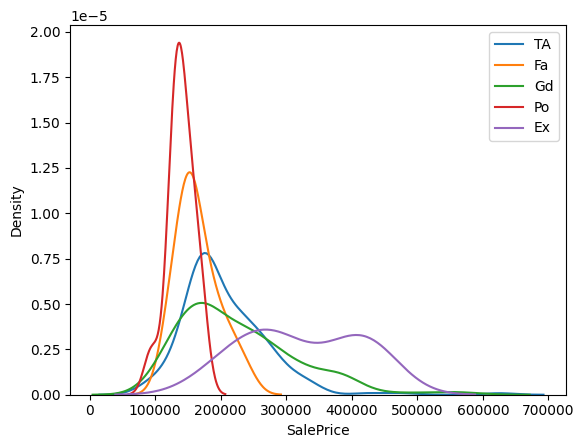

In [49]:
for category in x_train['FireplaceQu'].dropna().unique():
    sns.distplot(x_train[x_train['FireplaceQu']==category]['SalePrice'], hist=False, label=category)
plt.legend()
plt.show()

C:\Users\Pc\AppData\Local\Temp\ipykernel_10940\2942637954.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[x_train['FireplaceQu_imputed']==category]['SalePrice'], hist=False, label=category)
C:\Users\Pc\AppData\Local\Temp\ipykernel_10940\2942637954.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed297445

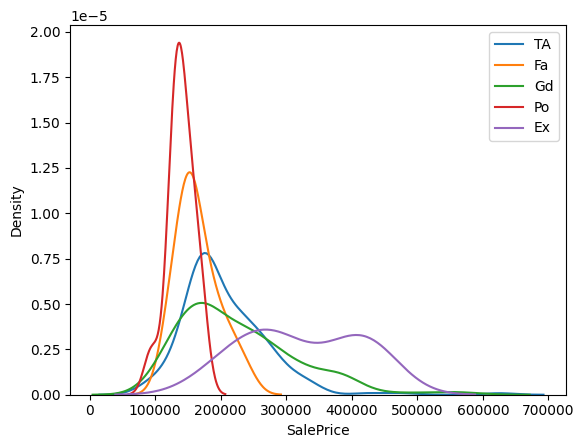

In [50]:
for category in x_train['FireplaceQu_imputed'].dropna().unique():
    sns.distplot(x_train[x_train['FireplaceQu_imputed']==category]['SalePrice'], hist=False, label=category)
plt.legend()
plt.show()